# 主題二、研究 GAN 背後的數學概念: Cross Entropy、KL Divergence 和 JS Divergence

除了老師規定比較的 Cross Entropy 和 KL Divergence，

我上網查詢資料時也發現 JS Divergence 是很經典的算法之一，因此決定一併加入以較。

### 1. 引入模組

In [ ]:
# 課堂四套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats # 數學工具包

### 2-1. 什麼是 Cross Entropy？

Cross Entropy（交叉熵）是衡量兩個機率分佈之間的相似性。

它的公式如下：
$$ CE(P, Q) = - \sum p(x) log q(x) $$

In [ ]:
def cross_entropy(p, q):
    return -np.sum(p * np.log(q + 1e-9))  # 加入小數防止 log(0)

### 2-2. 什麼是 KL Divergence？
KL 散度（Kullback-Leibler Divergence）測量兩個機率分佈的差異。

公式如下：
$$ KL(P || Q) = \sum p(x) log ( p(x) / q(x) ) $$


In [ ]:
def kl_divergence(p, q):
    return np.sum(p * np.log((p + 1e-9) / (q + 1e-9)))

### 2-3. 什麼是 JS Divergence？
JS 散度（Jensen-Shannon Divergence）是一種對稱的 KL 散度版本。

它的公式如下：
$$ JS(P || Q) = 0.5 * KL(P || M) + 0.5 * KL(Q || M)， M = (P + Q) / 2 $$

In [ ]:
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

### 3. 生成資料一

In [ ]:
x = np.linspace(-3, 3, 100)
p = stats.norm.pdf(x, loc=-0.5, scale=1)  # 常態分佈 P (模擬真實數據)
q = stats.norm.pdf(x, loc=0.5, scale=1)   # 常態分佈 Q (模擬生成器生出的數據)

### 4. 分別計算結果

In [ ]:
# 計算 Cross Entropy 和 KL Divergence
ce = cross_entropy(p, q)
kl = kl_divergence(p, q)
js = js_divergence(p, q)

### 5. Matplot 繪圖

視覺化計算結果。

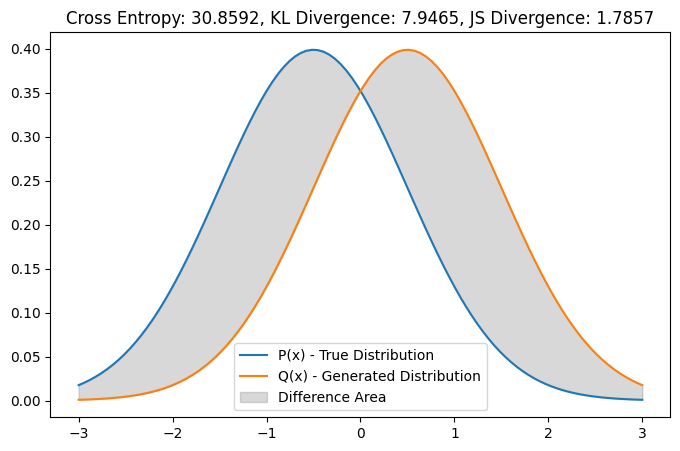

In [ ]:
plt.figure(figsize=(8, 5))  # 8x5 圖表
plt.plot(x, p, label='P(x) - True Distribution')  # 繪製 P(x)
plt.plot(x, q, label='Q(x) - Generated Distribution')  # 繪製 Q(x)
plt.fill_between(x, p, q, color='gray', alpha=0.3, label='Difference Area')  # 在 P(x) 和 Q(x) 包覆的區域內上色
plt.title(f'Cross Entropy: {ce:.4f}, KL Divergence: {kl:.4f}, JS Divergence: {js:.4f}')  # 標題列上分散程度
plt.legend()
plt.show()

### 6. 觀察&分析
- 交叉熵關注的是整體的錯誤程度，KL 散度則更關注 p 中的值。
- JS 散度應該是一種更穩定的測量方式，因為它對稱而且有邊界（0 到 1）。
- GAN 訓練中，JS 散度比 KL 散度更常被用來評估模型效果。
- KL 散度對於 Q(x) 過小的地方會產生極端值，可能導致訓練不穩定。
- Cross Entropy 在分類問題中的效果較好，適合監督式學習的應用場景。

### 7. 再測試一次不同的資料分佈數據

In [ ]:
x2 = np.linspace(0, 5, 100)
p2 = stats.expon.pdf(x2, scale=1)  # 指數分佈 P2
q2 = stats.uniform.pdf(x2, loc=0, scale=5)  # 均勻分佈 Q2

In [ ]:
# 計算新的 Cross Entropy、KL Divergence 和 JS Divergence
ce2 = cross_entropy(p2, q2)
kl2 = kl_divergence(p2, q2)
js2 = js_divergence(p2, q2)

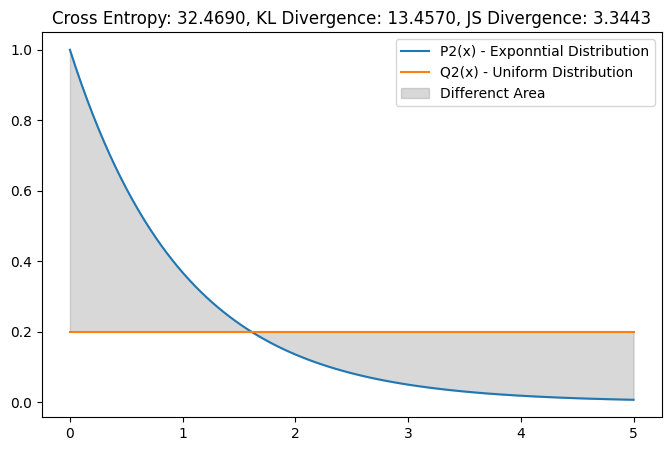

In [ ]:
# 視覺化第二組結果
plt.figure(figsize=(8, 5))
plt.plot(x2, p2, label='P2(x) - Exponntial Distribution')
plt.plot(x2, q2, label='Q2(x) - Uniform Distribution')
plt.fill_between(x2, p2, q2, color='gray', alpha=0.3, label='Differenct Area')
plt.title(f'Cross Entropy: {ce2:.4f}, KL Divergence: {kl2:.4f}, JS Divergence: {js2:.4f}')
plt.legend()
plt.show()

### 8. 使用時機分析
在簡單比較過兩組資料, 以及查閱文獻後的一些結論。
- 交叉熵適用於分類問題，像是神經網路中的 softmax 分類。
- KL 散度比較適合機率分佈的匹配，實際應用像是 VAE（變分自動編碼器）。
- JS 散度更適合於 GAN 訓練，因為它對稱而且有更好的數值穩定性。
- 上面可以發現 KL 在機率分佈差異大時會出現極端值，而 JS 散度較為平滑。
- Cross Entropy 在資料分佈極端時可能導致 loss 震盪，可能會需要去做正則化。

### 9. 參考文獻
* Goodfellow, I., Bengio, Y., Courville, A. (2016). Deep Learning. MIT Press.
* Kullback, S., Leibler, R. A. (1951). "On Information and Sufficiency". The Annals of Mathematical Statistics.
* Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. MIT Press.
* https://en.wikipedia.org/wiki/Cross_entropy
* https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
* https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
